In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import my_functions as ft # <--- Functions I wrote for the exercise.

In [2]:
# # Read in each split as a concatenation of all the datafiles
data_concat_train = ft.data_prep('kaggle/random_split/random_split/','train')
data_concat_dev = ft.data_prep('kaggle/random_split/random_split/','dev')
data_concat_test = ft.data_prep('kaggle/random_split/random_split/','test')

In [3]:
# Combine the data into one dataframe which can be supplied to a class
all_data = pd.concat([data_concat_train,data_concat_dev,data_concat_test],ignore_index=True)
all_data.to_csv('all_split_data_concat.csv',index=False) # <--- Save the data so I can read it back in easily. Can also easily move between projects.
# all_data = pd.read_csv('all_split_data_concat.csv') # <--- So you don't have to do this every time you rerun
all_data.query('split == "train"').head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence,split
0,GMC_oxred_C,A4WZS5_RHOS5/416-539,PF05199.13,PHPE.SRIRLST.RRDAHGMP.....IP.RIESRLGP............,PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAIL...,train
1,DUF2887,K9QI92_9NOSO/3-203,PF11103.8,RDSIYYQIFKRFPALIFEL..VD.NRPPQAQNYRFESVEVKETAFR...,RDSIYYQIFKRFPALIFELVDNRPPQAQNYRFESVEVKETAFRIDG...,train
2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE,train
3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,train
4,Filamin,A7SQM3_NEMVE/342-439,PF00630.19,TACPKQ.CTA....RGLG.............LK.AAPVT.QPT..R...,TACPKQCTARGLGLKAAPVTQPTRFVVILNDCHGQPLGRSEGELEV...,train


In [4]:
# Make df to store split analysis in.
splits = ['train','dev','test']

# Add percentage of all data.
percentage_of_data = []
for split in splits:
    percentage_of_data.append(len(all_data.query('split == @split').index)/len(all_data.index)*100)
df_split_analysis = pd.DataFrame({'percentage':percentage_of_data},index=['train','dev','test'])

# Add the number of unique families.
unique_families = []
for split in splits:
    unique_families.append(int(len(all_data.query('split == @split').family_id.value_counts().index)))
df_split_analysis['unique_families'] = unique_families

df_split_analysis

,percentage,unique_families
train,81.155612,17929
dev,9.422194,13071
test,9.422194,13071


In [5]:
print('Families in entire dataset: '+str(int(len(np.unique(all_data.family_id)))))
print('Families in training dataset: '+str(int(len(np.unique(all_data.query('split == "train"').family_id))))+'\n')
print('The training set contains all unique families in the entire dataset.')
print('The dev and test sets only cover '+str(np.around((df_split_analysis.unique_families.iloc[1]/df_split_analysis.unique_families.iloc[0])*100,decimals=2))+'% of total families.')

Families in entire dataset: 17929
Families in training dataset: 17929

The training set contains all unique families in the entire dataset.
The dev and test sets only cover 72.9% of total families.


This is okay as it means the model will be trained on all families it may encounter in the validation data.\
If the training set didn't contain all families in the dataframe then it would be possible for the validation set to contain a family the training set has not seen before.\
If this weren't the case it could be a potential issue but not necessarily.

In [6]:
print('The training set contains '+str(np.around(df_split_analysis.percentage.iloc[0],decimals=2))+'% of the entire dataset.')
print('The dev and test sets contain '+str(np.around(df_split_analysis.percentage.iloc[1],decimals=2))+'% of the entire dataset each.')

The training set contains 81.16% of the entire dataset.
The dev and test sets contain 9.42% of the entire dataset each.


This is a good split and ensures the model is well trained.

In [7]:
# Add features to analyse later in the notebook
all_data['sequence_length'] = all_data.sequence.str.len()
all_data['aligned_sequence_length'] = all_data.aligned_sequence.str.len()
all_data['aligned_sequence_missing_residues'] = all_data.aligned_sequence_length-all_data.sequence_length
all_data['percentage_missing_residues'] = 100*all_data.aligned_sequence_missing_residues/all_data.aligned_sequence_length
all_data.percentage_missing_residues.round(2)
all_data.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence,split,sequence_length,aligned_sequence_length,aligned_sequence_missing_residues,percentage_missing_residues
0,GMC_oxred_C,A4WZS5_RHOS5/416-539,PF05199.13,PHPE.SRIRLST.RRDAHGMP.....IP.RIESRLGP............,PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAIL...,train,124,245,121,49.387755
1,DUF2887,K9QI92_9NOSO/3-203,PF11103.8,RDSIYYQIFKRFPALIFEL..VD.NRPPQAQNYRFESVEVKETAFR...,RDSIYYQIFKRFPALIFELVDNRPPQAQNYRFESVEVKETAFRIDG...,train,201,219,18,8.219178
2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE,train,44,55,11,20.000000
3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,train,115,121,6,4.958678
4,Filamin,A7SQM3_NEMVE/342-439,PF00630.19,TACPKQ.CTA....RGLG.............LK.AAPVT.QPT..R...,TACPKQCTARGLGLKAAPVTQPTRFVVILNDCHGQPLGRSEGELEV...,train,98,361,263,72.853186


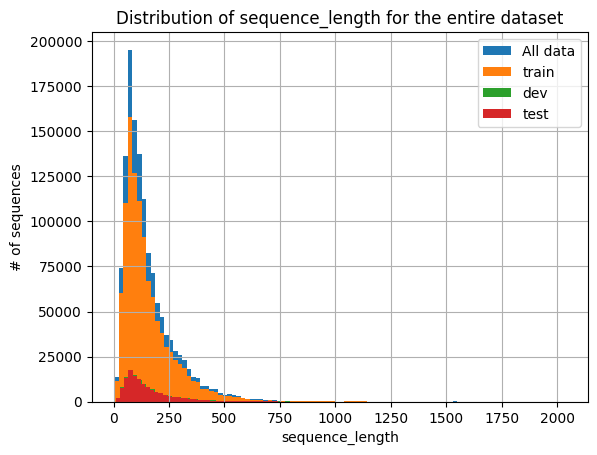

In [8]:
plt = ft.plot_hist_comp(all_data,'sequence_length')

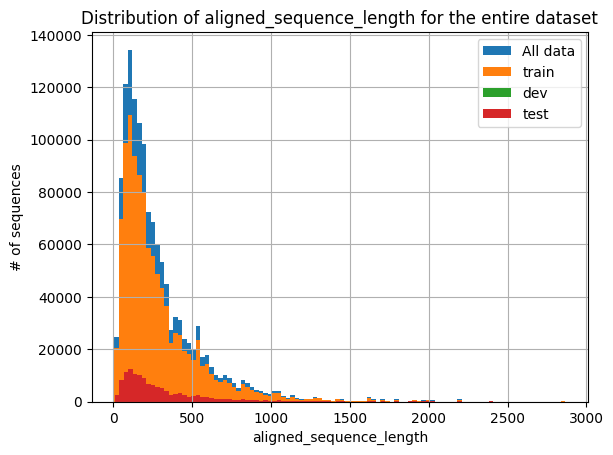

In [9]:
plt = ft.plot_hist_comp(all_data,'aligned_sequence_length')

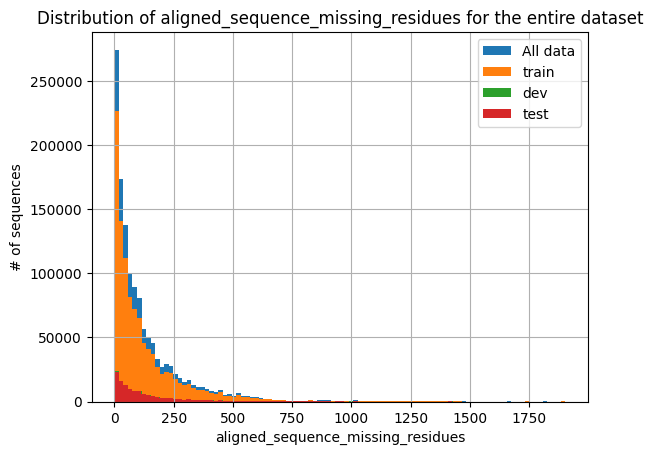

In [10]:
plt = ft.plot_hist_comp(all_data,'aligned_sequence_missing_residues')

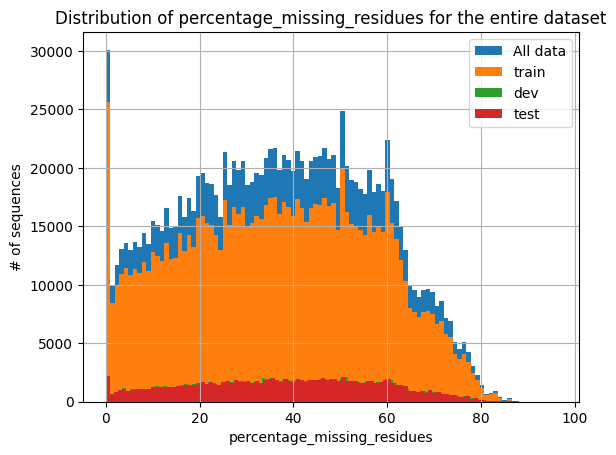

In [11]:
plt = ft.plot_hist_comp(all_data,'percentage_missing_residues')

In [12]:
ft.seq_threshold_check(all_data,'sequence_length',310)
ft.seq_threshold_check(all_data,'aligned_sequence_length',600)
ft.seq_threshold_check(all_data,'aligned_sequence_missing_residues',330)
ft.seq_threshold_check(all_data,'percentage_missing_residues',63)

90% of feature sequence_length are less than 310
Feature max: 2037

90% of feature aligned_sequence_length are less than 600
Feature max: 2866

90% of feature aligned_sequence_missing_residues are less than 330
Feature max: 1903

90% of feature percentage_missing_residues are less than 63
Feature max: 96.11650485436893



Here I have assessed 90% of the dataset to determine how extreme outliers in the final 10% are.

*Sequences*\
Most sequences are about ~70 residues long.\
This could be an issue when considering longer sequences which the model is not well trained on.\
All datasets have a similar distribution.

*Aligned sequences*\
Aligned sequences are generally around ~115, however this is far less agregated than for unaligned sequences.\
The most common sequences range from ~50-150.

*Missing residues*\
Most aligned sequences aren't missing too much, however there are some missing significant amounts.\
This could be an issue as the model will not be well trained on these points.\
The missing percentage can go as high as 96%, which is extremely high and likely will cause issues with prediction.

As shown above, the longest sequences in the dataset are significantly longer than the average and there are outlying sequences with a significant amount of missing residues.\
It's reasonable to assume the model may have trouble predicting these as it is not well trained on these outliers.\
Sequences with a high percentage of missing residues are also likely an issue for prediction.

<module 'matplotlib.pyplot' from 'd:\\windows\\OneDrive - University of Southampton\\interview_stuff\\Instadeep\\test_2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

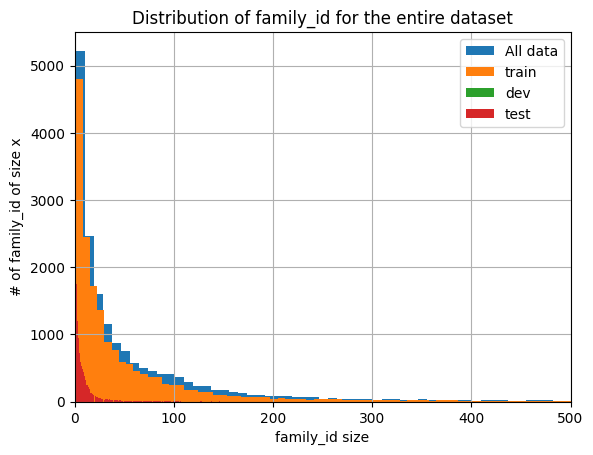

In [13]:
ft.val_count_hist(all_data,'family_id',xlim=[0,500],ylim=[0,5500])

<module 'matplotlib.pyplot' from 'd:\\windows\\OneDrive - University of Southampton\\interview_stuff\\Instadeep\\test_2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

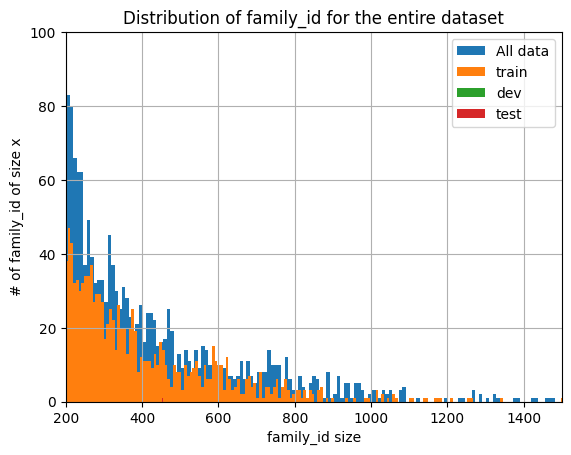

In [14]:
ft.val_count_hist(all_data,'family_id',xlim=[200,1500],ylim=[0,100])

In [15]:
ft.val_count_seq_threshold_check(all_data,'family_id',170)

90% of feature family_id are less than 170
Largest group: 4545



Most families in the dataset are significantly smaller than 170.\
Larger families will contain more data points meaning the model can be trained on them better.\
The fact that there are many small families means the dataset should be truncated.

In [20]:
AA_counts = []
for AA in ft.acid_list:
    AA_counts.append(all_data.sequence.str.count(AA).sum())
AA_counts = AA_counts/max(AA_counts)
df_AA_counts = pd.DataFrame({'amino_acid':ft.acid_list,'amino_acid_freq':AA_counts})
df_AA_counts = df_AA_counts.sort_values('amino_acid_freq',ascending=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


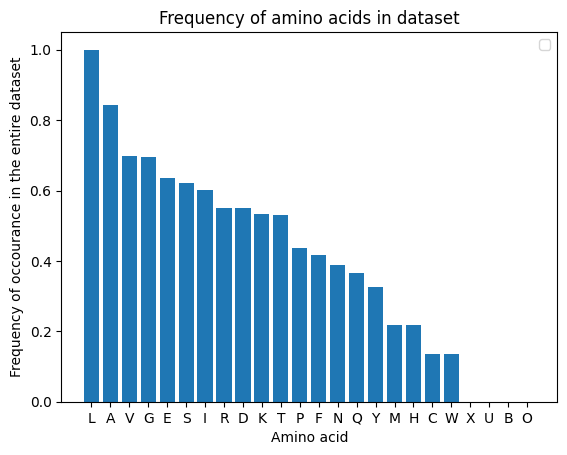

In [21]:
plt.bar(df_AA_counts.amino_acid,df_AA_counts.amino_acid_freq)
plt.title('Frequency of amino acids in dataset')
plt.xlabel('Amino acid')
plt.ylabel('Frequency of occourance in the entire dataset')
plt.legend()

Some amino acids such as Methionine, Histidine, Cysteine and Tryptophan are poorly represented.
Other codes such as B (Asparagine or Aspartic acid), Z (Glutamine or Glutamic acid), U (Selenocysteine) or X (Any amino acid) are extremely rare.\
This shows there is significant imbalance in terms of amino acids represented in the dataset.